[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Notas_Estructuradas/blob/main/Sesion08_NotasE_VaR_DV01.ipynb)

# UDIBONOS

In [ ]:
# Ejemplo de instalalción
# !pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

import yfinance as yf

import matplotlib.pyplot as plt

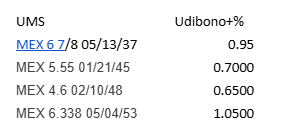

## Trato de fechas:

In [ ]:
vencimiento = pd.to_datetime("05-04-2053", format='%m-%d-%Y')
vencimiento

Timestamp('2053-05-04 00:00:00')

In [ ]:
proximo_pago = pd.to_datetime("05-04-2025", format='%m-%d-%Y') + pd.to_timedelta('182 days')
proximo_pago

Timestamp('2025-11-02 00:00:00')

In [ ]:
hoy = pd.to_datetime("today").normalize()
hoy

Timestamp('2025-05-21 00:00:00')

In [ ]:
# Variables dadas (ejemplo)
Tasa_udi = 0.04                                 # Jugaremos con esta variable, sobre el pago de cupon
T_c = 0.0105 + Tasa_udi                         # tasa cupón anual (cupon udibono + 1.05%)
T_r = 0.049                                      # tasa real YTM anual (4.9%)
C = np.ceil((vencimiento - hoy).days/182)       # número de cupones restantes
DCV = (proximo_pago - hoy).days                 # días hasta próximo cupón
PCV = 182                                       # periodo del cupón (días)
VN = 100                                        # valor nominal en UDIs

# Fórmula de precio limpio de un UDIBONO

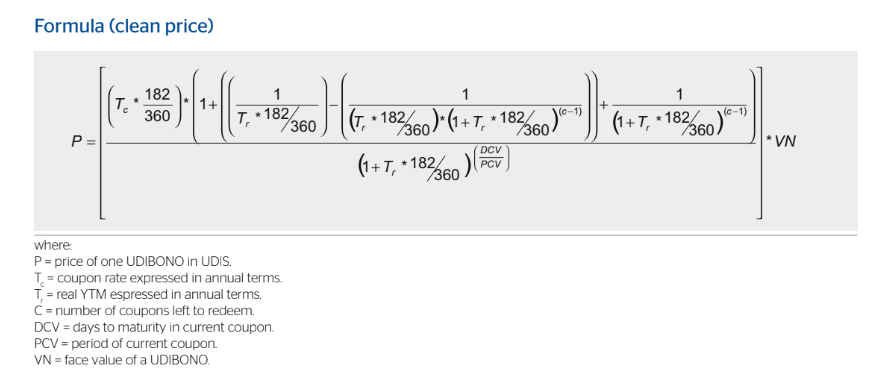

In [ ]:
def precio_en_udis_udibono(T_c, T_r, C, DCV, PCV, VN):
  valor_a = 1/(T_r*182/360)
  valor_b = 1/(1 + T_r*182/360)**(C-1)
  numerador = (T_c * 182/360)*(1 + (valor_a - valor_a*valor_b) + valor_b)
  denominador = (1 + T_r*(182/360))**(DCV/PCV)
  precio_en_udis = numerador/denominador
  precio_en_udis = precio_en_udis*VN
  return precio_en_udis

Guardemoslo en una variable:

In [ ]:
precio_udibono_en_udis = precio_en_udis_udibono(T_c, T_r, C, DCV, PCV, VN)
precio_udibono_en_udis

np.float64(78.32609260172305)

In [ ]:
valor_de_udi = 8.462151

In [ ]:
precio_udibono_en_mxn = precio_udibono_en_udis * valor_de_udi
precio_udibono_en_mxn

np.float64(662.8072228357634)

# Ahora, para valuar el bono

In [ ]:
def valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual, num_cupones, frecuencia, DCV, PCV):
    precio = 0
    tasa_cupon_periodo = tasa_cupon / frecuencia
    rendimiento_periodo = rendimiento_anual / frecuencia
    cupón = VN * tasa_cupon_periodo
    for i in range(1, num_cupones + 1):
        precio += cupón / (1 + rendimiento_periodo) ** i

    # Descontar el valor nominal al final
    precio += VN / (1 + rendimiento_periodo) ** num_cupones
    precio_limpio = precio - cupón*(DCV/PCV)
    return precio



In [ ]:
# Ejemplo de uso:
VN = 100
tasa_cupon = 0.06338   # 6.338%
rendimiento_anual = 0.045  # 4.5% rendimiento
num_cupones = int(C)
frecuencia = 2  # pagos semestrales

precio_en_dolares = valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual, num_cupones, frecuencia, DCV, PCV)



In [ ]:
precio_en_dolares

129.35434089609885

In [ ]:
precio_pesos = precio_en_dolares * 19.37
precio_pesos

2505.5935831574348

In [ ]:
valores = np.linspace(0.02, 0.10, 17)
valores

array([0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 ,
       0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095, 0.1  ])

In [ ]:
data = pd.DataFrame({'dif_%_Udibono' : valores, 'precio_udibono_pesos' : [np.nan]*len(valores), 'precio_ums_pesos': [np.nan]*len(valores)})
data

,dif_%_Udibono,precio_udibono_pesos,precio_ums_pesos
0,0.020,NaN,NaN
1,0.025,NaN,NaN
2,0.030,NaN,NaN
3,0.035,NaN,NaN
4,0.040,NaN,NaN
5,0.045,NaN,NaN
6,0.050,NaN,NaN
7,0.055,NaN,NaN
8,0.060,NaN,NaN
9,0.065,NaN,NaN


In [ ]:
data['precio_udibono_pesos'] = data['dif_%_Udibono'].apply(lambda x: precio_en_udis_udibono( 0.0105 + x, T_r, C, DCV, PCV, VN)*valor_de_udi)
data

,dif_%_Udibono,precio_udibono_pesos,precio_ums_pesos
0,0.020,400.309313,NaN
1,0.025,465.933790,NaN
2,0.030,531.558268,NaN
3,0.035,597.182745,NaN
4,0.040,662.807223,NaN
5,0.045,728.431700,NaN
6,0.050,794.056178,NaN
7,0.055,859.680655,NaN
8,0.060,925.305133,NaN
9,0.065,990.929610,NaN


In [ ]:
data['precio_ums_pesos'] = data['dif_%_Udibono'].apply(lambda x: valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual, num_cupones, frecuencia, DCV, PCV)* 19.37)
data

,dif_%_Udibono,precio_udibono_pesos,precio_ums_pesos
0,0.020,400.309313,2505.593583
1,0.025,465.933790,2505.593583
2,0.030,531.558268,2505.593583
3,0.035,597.182745,2505.593583
4,0.040,662.807223,2505.593583
5,0.045,728.431700,2505.593583
6,0.050,794.056178,2505.593583
7,0.055,859.680655,2505.593583
8,0.060,925.305133,2505.593583
9,0.065,990.929610,2505.593583


In [ ]:
capital = 1_000_000

In [ ]:
data['udibonos_a_comprar'] = capital/data['precio_udibono_pesos']
data['ums_a_comprar'] = capital/data['precio_ums_pesos']

In [ ]:
data

,dif_%_Udibono,precio_udibono_pesos,precio_ums_pesos,udibonos_a_comprar,ums_a_comprar
0,0.020,400.309313,2505.593583,2498.068289,399.107025
1,0.025,465.933790,2505.593583,2146.227685,399.107025
2,0.030,531.558268,2505.593583,1881.261304,399.107025
3,0.035,597.182745,2505.593583,1674.529292,399.107025
4,0.040,662.807223,2505.593583,1508.734313,399.107025
5,0.045,728.431700,2505.593583,1372.812303,399.107025
6,0.050,794.056178,2505.593583,1259.356741,399.107025
7,0.055,859.680655,2505.593583,1163.222638,399.107025
8,0.060,925.305133,2505.593583,1080.724579,399.107025
9,0.065,990.929610,2505.593583,1009.153415,399.107025


Recordemos que el valor facial del UDIBONO era 100 UDIS, es decir 846.2151 pesos y paga cupón del valor de la columna "dif_%_Udibono"

Recordemos que el valor facial del UMS es 100 dólares, es decir 1,937.0 pesos y paga un cupón de 6.338%

# Tipos de cambio

In [ ]:
data_usmmx = yf.download(
        # Lista de tickers o puede ser un string
        tickers = "MXN=X",

        # Parámetro "period", tambien se puede utilizar start/end
        # periodos válidos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (opcional, default es '1mo')
        period = "1y",

        # Peidr datos por intervalo (incluye intradía si es menor a 60 days)
        # intervalos válidos: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (opcional, default es '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (opcional, default es 'column')
        # group_by = 'ticker',
    ).loc[:,'Close']
data_usmmx

[*********************100%***********************]  1 of 1 completed


Ticker,MXN=X
Date,
2024-05-21,16.552570
2024-05-22,16.606600
2024-05-23,16.661631
2024-05-24,16.730370
2024-05-27,16.673800
...,...
2025-05-15,19.383060
2025-05-16,19.471399
2025-05-19,19.451170


In [ ]:
data_udis = pd.read_excel('/content/Consulta_20250521-125708107.xlsx', skiprows=17, index_col='Fecha', date_format='Fecha')
data_udis

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SP68257
Fecha,
2020-01-14,6.418572
2020-01-15,6.419954
2020-01-16,6.421336
2020-01-17,6.422718
2020-01-18,6.424100
...,...
2025-05-21,8.469848
2025-05-22,8.470948
2025-05-23,8.472049


In [ ]:
data_udis = data_udis[data_udis.index >= '2024-05-21']
data_udis

,SP68257
Fecha,
2024-05-21,8.150367
2024-05-22,8.151722
2024-05-23,8.153078
2024-05-24,8.154433
2024-05-25,8.155789
...,...
2025-05-21,8.469848
2025-05-22,8.470948
2025-05-23,8.472049


In [ ]:
tipo_cambio = pd.concat([data_usmmx, data_udis], axis=1).ffill()
tipo_cambio

,MXN=X,SP68257
2024-05-21,16.552570,8.150367
2024-05-22,16.606600,8.151722
2024-05-23,16.661631,8.153078
2024-05-24,16.730370,8.154433
2024-05-25,16.730370,8.155789
...,...,...
2025-05-21,19.371000,8.469848
2025-05-22,19.371000,8.470948
2025-05-23,19.371000,8.472049
2025-05-24,19.371000,8.473149


In [ ]:
tipo_cambio['dolar_en_udis'] = tipo_cambio['MXN=X']/tipo_cambio['SP68257']
tipo_cambio

,MXN=X,SP68257,dolar_en_udis
2024-05-21,16.552570,8.150367,2.030899
2024-05-22,16.606600,8.151722,2.037189
2024-05-23,16.661631,8.153078,2.043600
2024-05-24,16.730370,8.154433,2.051690
2024-05-25,16.730370,8.155789,2.051349
...,...,...,...
2025-05-21,19.371000,8.469848,2.287054
2025-05-22,19.371000,8.470948,2.286757
2025-05-23,19.371000,8.472049,2.286460
2025-05-24,19.371000,8.473149,2.286163


<Axes: >

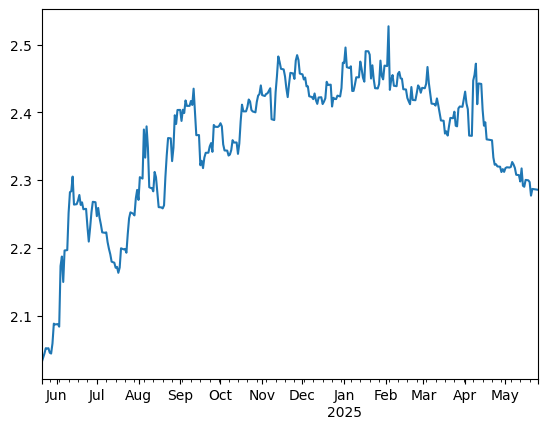

In [ ]:
tipo_cambio['dolar_en_udis'].plot()

In [ ]:
tipo_cambio['cambio_porcentual'] = tipo_cambio['dolar_en_udis'].pct_change()
tipo_cambio

,MXN=X,SP68257,dolar_en_udis,cambio_porcentual
2024-05-21,16.552570,8.150367,2.030899,NaN
2024-05-22,16.606600,8.151722,2.037189,0.003097
2024-05-23,16.661631,8.153078,2.043600,0.003147
2024-05-24,16.730370,8.154433,2.051690,0.003959
2024-05-25,16.730370,8.155789,2.051349,-0.000166
...,...,...,...,...
2025-05-21,19.371000,8.469848,2.287054,0.004334
2025-05-22,19.371000,8.470948,2.286757,-0.000130
2025-05-23,19.371000,8.472049,2.286460,-0.000130
2025-05-24,19.371000,8.473149,2.286163,-0.000130


<Axes: ylabel='Frequency'>

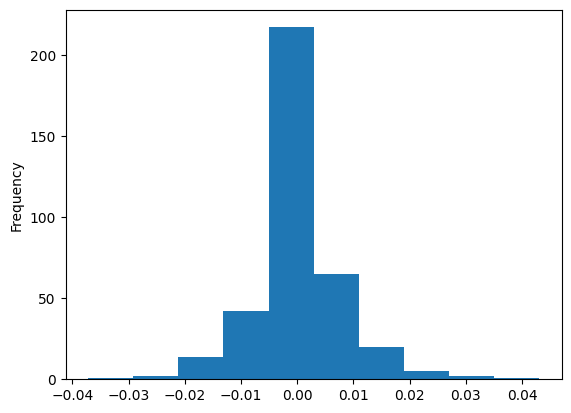

In [ ]:
tipo_cambio.cambio_porcentual.plot.hist()

<Axes: ylabel='Frequency'>

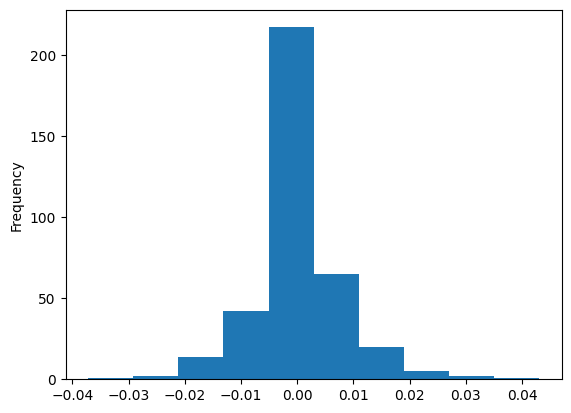

In [ ]:
tipo_cambio['cambio_porcentual'].plot.hist()

# Test Dickey-Fuller:


<Axes: >

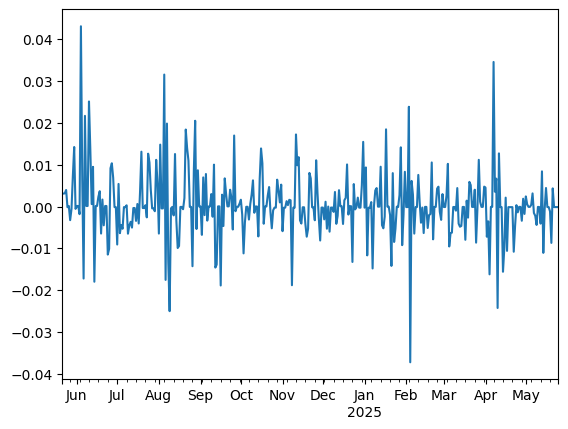

In [ ]:
tipo_cambio.cambio_porcentual.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(tipo_cambio.cambio_porcentual.dropna())

In [ ]:
resultado_adf

(np.float64(-7.000609613116955),
 np.float64(7.338622176933583e-10),
 6,
 362,
 {'1%': np.float64(-3.448544133483233),
  '5%': np.float64(-2.8695574079525565),
  '10%': np.float64(-2.5710411593052713)},
 np.float64(-2442.5373665559214))

In [ ]:
p_valor = resultado_adf[1]
p_valor

np.float64(7.338622176933583e-10)

# VaR: Dado un %, estima la pérdida potencial que podríamos tener con esa probabilidad.

In [ ]:
# Value at risk del 5% en el cambio Udis-Dólar
var = tipo_cambio.cambio_porcentual.quantile(0.05)
var

np.float64(-0.011347718166316367)

In [ ]:
# Dependiendo del enfoque, puede interesarnos el cuantil del 95%
var2 = tipo_cambio.cambio_porcentual.quantile(0.95)
var2

np.float64(0.013380973371811572)

# último valor visto de Dólar en Udis

In [ ]:
tipo_cambio.dolar_en_udis.iloc[-1]

np.float64(2.285866309795357)

## Hay un 5% de probabilidad que caiga mas abajo de:

In [ ]:
caida = tipo_cambio.dolar_en_udis.iloc[-1]*(1 + var)
caida

np.float64(2.2599269431459215)

## Hay un 5% de probabilidad que suba mas arriba de:

In [ ]:
subida = tipo_cambio.dolar_en_udis.iloc[-1]*(1 + var2)
subida

np.float64(2.3164534260182497)

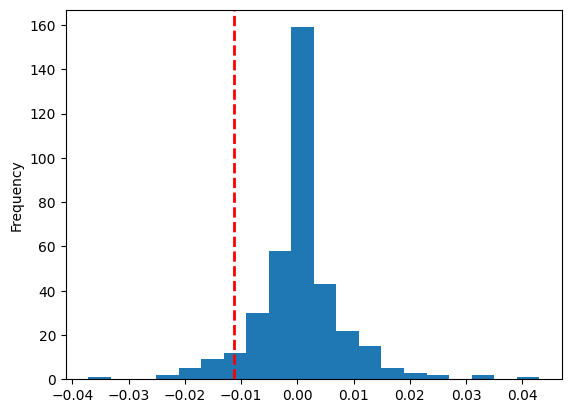

In [ ]:
ax = tipo_cambio.cambio_porcentual.plot.hist(bins=20)

# Agregar línea vertical, por ejemplo, en el valor 3.5
plt.axvline(x=var, color='red', linestyle='--', linewidth=2)

# Mostrar gráfico
plt.show()

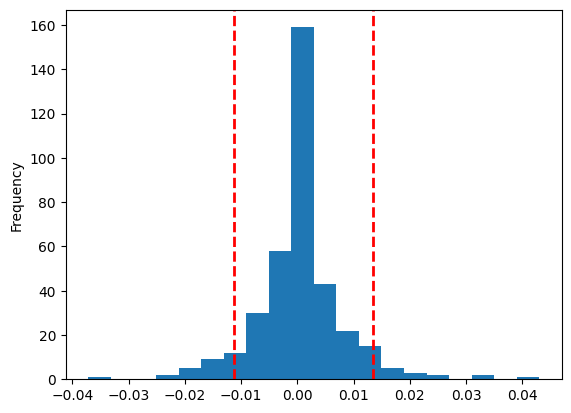

In [ ]:
ax = tipo_cambio.cambio_porcentual.plot.hist(bins=20)

# Agregar línea vertical, por ejemplo, en el valor 3.5
plt.axvline(x=var, color='red', linestyle='--', linewidth=2)
plt.axvline(x=var2, color='red', linestyle='--', linewidth=2)
# Mostrar gráfico
plt.show()

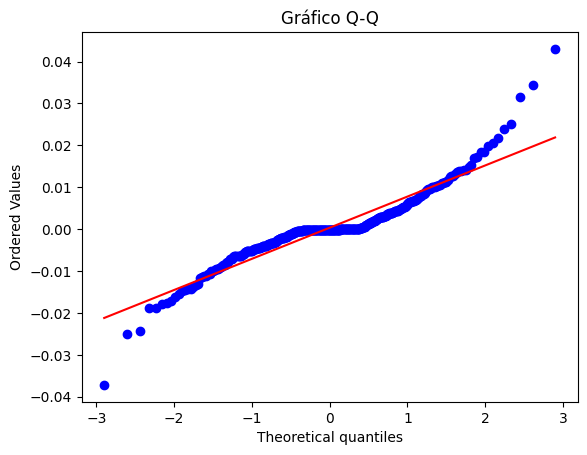

In [ ]:
import scipy.stats as stats

osm, osr = stats.probplot(tipo_cambio.cambio_porcentual.dropna(), dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

In [ ]:
osr

(np.float64(0.00743250092315558),
 np.float64(0.0003512346970100945),
 np.float64(0.9411570139192822))

El primer valor es aproximación de la desviación y el segundo es la aproximación de la media.

El tercer valor es coeficiente de correlación con la recta.

# Retomemos los otros datos:

In [ ]:
data_cupones = pd.DataFrame()

In [ ]:
data_cupones['pago_por_cupon_UDIS'] = 100 * (data['dif_%_Udibono'] + 0.0105)
data_cupones['pago_por_cupon_dolares'] = 100 * (0.06338)
data_cupones

,pago_por_cupon_UDIS,pago_por_cupon_dolares
0,3.05,6.338
1,3.55,6.338
2,4.05,6.338
3,4.55,6.338
4,5.05,6.338
5,5.55,6.338
6,6.05,6.338
7,6.55,6.338
8,7.05,6.338
9,7.55,6.338


In [ ]:
data_cupones['capital_udis'] = data_cupones['pago_por_cupon_UDIS'] * data['udibonos_a_comprar']
data_cupones['capital_dolares'] = data_cupones['pago_por_cupon_dolares'] * data['ums_a_comprar']
data_cupones

,pago_por_cupon_UDIS,pago_por_cupon_dolares,capital_udis,capital_dolares
0,3.05,6.338,7619.108281,2529.540322
1,3.55,6.338,7619.108281,2529.540322
2,4.05,6.338,7619.108281,2529.540322
3,4.55,6.338,7619.108281,2529.540322
4,5.05,6.338,7619.108281,2529.540322
5,5.55,6.338,7619.108281,2529.540322
6,6.05,6.338,7619.108281,2529.540322
7,6.55,6.338,7619.108281,2529.540322
8,7.05,6.338,7619.108281,2529.540322
9,7.55,6.338,7619.108281,2529.540322


In [ ]:
data_cupones['capital_subida'] = data_cupones['capital_dolares'] * subida
data_cupones['capital_caida'] = data_cupones['capital_dolares'] * caida
data_cupones

,pago_por_cupon_UDIS,pago_por_cupon_dolares,capital_udis,capital_dolares,capital_subida,capital_caida
0,3.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328
1,3.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328
2,4.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328
3,4.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328
4,5.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328
5,5.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328
6,6.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328
7,6.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328
8,7.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328
9,7.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328


In [ ]:
data_cupones['capital_dolares_en_udis'] = data_cupones['capital_dolares'] * tipo_cambio.dolar_en_udis.iloc[-1]

In [ ]:
data_cupones

,pago_por_cupon_UDIS,pago_por_cupon_dolares,capital_udis,capital_dolares,capital_subida,capital_caida,capital_dolares_en_udis
0,3.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
1,3.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
2,4.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
3,4.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
4,5.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
5,5.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
6,6.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
7,6.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
8,7.05,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002
9,7.55,6.338,7619.108281,2529.540322,5859.562346,5716.576328,5782.191002


# DV01: Medida de sensibilidad

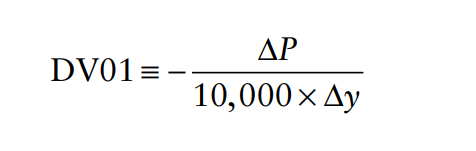

Donde:
$P(y)$ es el precio del instrumento respecto a la tasa de interés.

Recordemos el código que utilizamos ya para valuar un cupón:

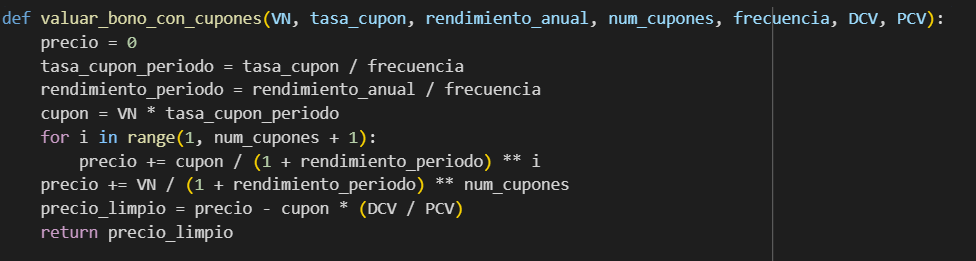

In [ ]:
# Parámetros del bono
VN = 100                # Valor nominal
tasa_cupon = 0.06883        # 5% anual
rendimiento_anual = 0.045   # 4.5% mercado (este sería el rendimineto del UMS)
frecuencia = 2           # Semestral (2 cupones al año)
años = int((vencimiento - hoy).days/365)
num_cupones = años * frecuencia
DCV = (proximo_pago - hoy).days   # Días desde último cupón
PCV = 182                          # Período entre cupones (en días)
punto_base = 0.0001      # 1 punto base

# Precio con tasa actual
precio_original = valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual, num_cupones, frecuencia, DCV, PCV)

# Precio con +1 punto base
precio_ajustado = valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual + punto_base, num_cupones, frecuencia, DCV, PCV)

# Calcular DV01
dv01 = precio_original - precio_ajustado

# Resultados
print(f"Precio original: ${precio_original:.4f}")
print(f"Precio con +1 punto base: ${precio_ajustado:.4f}")
print(f"DV01: ${dv01:.6f}")


Precio original: $137.0301
Precio con +1 punto base: $136.8347
DV01: $0.195428


Si la tasa de interés del mercado sube en 1 punto base (0.01%), el precio del bono baja aproximadamente $0.1954 por bono.

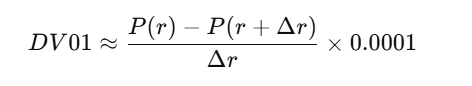